In [28]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [2]:
print(X_train.shape)
print(X_test.shape)


(120, 4)
(30, 4)


In [3]:
print(model.predict(X_test)[:5])  # Check model outputs


[1 0 2 1 1]


In [4]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test, check_additivity=False)  # Still useful to disable check if needed

In [8]:
shap_values = explainer(X_test, check_additivity=False)

In [9]:
shap_values

.values =
array([[[-1.09833332e-02,  3.13749992e-02, -2.03916663e-02],
        [-5.28333317e-03, -2.82500017e-03,  8.10833334e-03],
        [-1.66466663e-01,  3.28358326e-01, -1.61891663e-01],
        [-1.67966663e-01,  3.06591660e-01, -1.38624996e-01]],

       [[-6.56666652e-03,  1.90416665e-02, -1.24749997e-02],
        [ 3.51499992e-02, -2.20749994e-02, -1.30750000e-02],
        [ 3.11616660e-01, -1.40774997e-01, -1.70841663e-01],
        [ 3.09099993e-01, -1.82691663e-01, -1.26408332e-01]],

       [[-1.83333326e-02, -2.81499998e-02,  4.64833321e-02],
        [-2.99999991e-03,  3.94999981e-03, -9.49999742e-04],
        [-1.66899997e-01, -1.55216663e-01,  3.22116660e-01],
        [-1.62466663e-01, -1.17083331e-01,  2.79549995e-01]],

       [[-1.29999998e-02,  4.29416658e-02, -2.99416661e-02],
        [-3.24999989e-03, -2.47500019e-03,  5.72499997e-03],
        [-1.66483330e-01,  3.31858326e-01, -1.65374996e-01],
        [-1.67966663e-01,  2.91174994e-01, -1.23208330e-01]],

      

In [10]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print(X_train.shape)
print(X_test.shape)
print(model.predict(X_test)[:5])  # Check model outputs

(120, 4)
(30, 4)
[1 0 2 1 1]


In [14]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test, check_additivity=False)

shap_values

array([[[-1.09833332e-02,  3.13749992e-02, -2.03916663e-02],
        [-5.28333317e-03, -2.82500017e-03,  8.10833334e-03],
        [-1.66466663e-01,  3.28358326e-01, -1.61891663e-01],
        [-1.67966663e-01,  3.06591660e-01, -1.38624996e-01]],

       [[-6.56666652e-03,  1.90416665e-02, -1.24749997e-02],
        [ 3.51499992e-02, -2.20749994e-02, -1.30750000e-02],
        [ 3.11616660e-01, -1.40774997e-01, -1.70841663e-01],
        [ 3.09099993e-01, -1.82691663e-01, -1.26408332e-01]],

       [[-1.83333326e-02, -2.81499998e-02,  4.64833321e-02],
        [-2.99999991e-03,  3.94999981e-03, -9.49999742e-04],
        [-1.66899997e-01, -1.55216663e-01,  3.22116660e-01],
        [-1.62466663e-01, -1.17083331e-01,  2.79549995e-01]],

       [[-1.29999998e-02,  4.29416658e-02, -2.99416661e-02],
        [-3.24999989e-03, -2.47500019e-03,  5.72499997e-03],
        [-1.66483330e-01,  3.31858326e-01, -1.65374996e-01],
        [-1.67966663e-01,  2.91174994e-01, -1.23208330e-01]],

       [[-1.3133

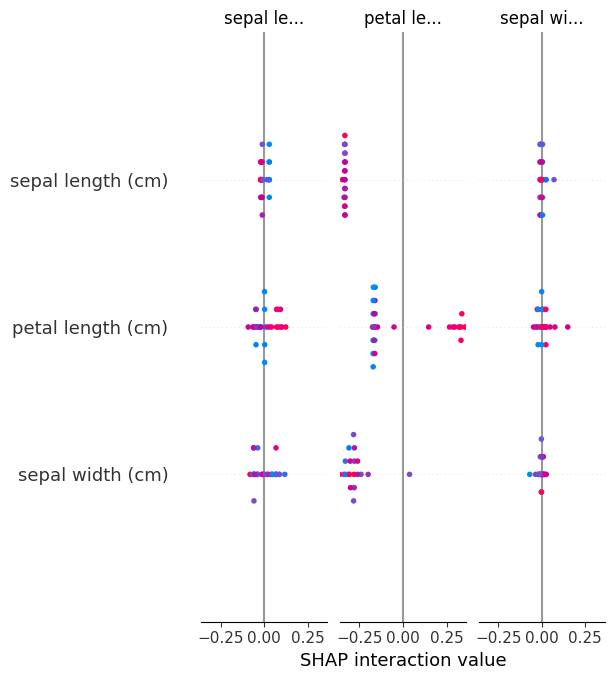

In [15]:
shap.summary_plot(shap_values, X_test, feature_names=df.columns)

📌 Interpretation of the SHAP Interaction Plot

Axes:

Y-axis: Feature names (sepal length, petal length, sepal width).

X-axis: SHAP interaction values, showing how much each feature interaction contributes to the model's prediction.

The title labels on the x-axis (sepal le..., petal le..., sepal wi...) indicate the features that are being analyzed for interactions.


Dots:

Each dot represents a data point from the dataset.
Color coding:
1. Red: Higher feature values.
2. Blue: Lower feature values.
3. Purple: Intermediate values.

The spread of the dots indicates the degree of interaction between features.
Feature Interactions:

Each column represents the interaction between one feature (on the x-axis) and another feature (on the y-axis).
The wider the spread of dots, the stronger the interaction between those features.

🔍 Key Observations from Plot
1. sepal length (cm) interacts with itself and petal length (cm) significantly.
2. petal length (cm) has a noticeable interaction with sepal width (cm).
3. The symmetry in interactions shows that the model relies on multiple features together to make decisions.

Some interactions cluster around zero, meaning they have little impact on model predictions.

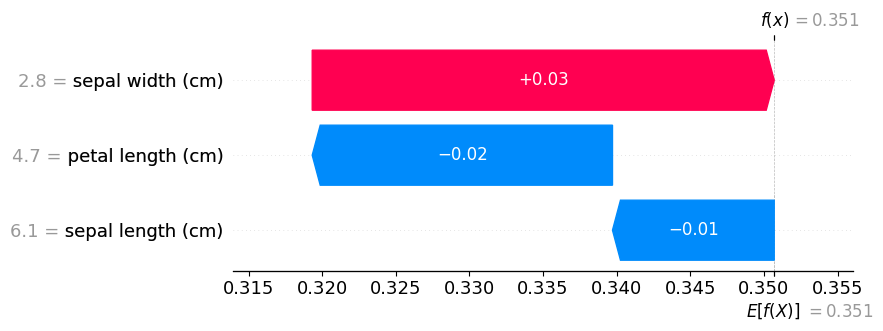

In [22]:
shap.waterfall_plot(shap.Explanation(values=shap_values[0][0], base_values=explainer.expected_value[0], data=X_test.iloc[0]))

Key Prediction Information:


f(x): The model's predicted value for this instance (in this case, 0.351).

E[f(x)]: The model's base value, or the average prediction over all training data (also 0.351 in this case).
Feature Contributions:

Each feature contributes positively or negatively to the prediction relative to the base value.
Positive contributions (red) push the prediction higher, while negative contributions (blue) lower the prediction.


Feature-specific Details:

Sepal width (cm) (2.8): This feature adds +0.03 to the base value, increasing the prediction.

Petal length (cm) (4.7): This feature subtracts -0.02 from the base value, decreasing the prediction.

Sepal length (cm) (6.1): This feature subtracts -0.01 from the base value.
Final Prediction:

The sum of the base value and all feature contributions equals the final prediction
𝑓(𝑥)=0.351

SHAP values shape: (30, 4, 3)
(30, 4)


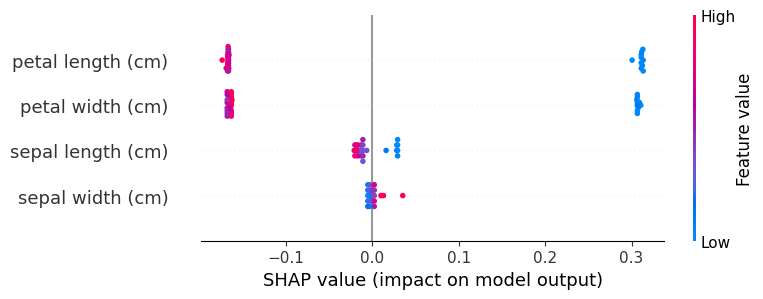

In [27]:
# ✅ Check SHAP values
print(f"SHAP values shape: {np.array(shap_values).shape}")  # Should be (num_classes, num_samples, num_features)
print(X_test.shape)  # Should print something like (30, 4)

# Select SHAP values for class 0 (the third dimension)
shap.summary_plot(shap_values[:, :, 0], X_test, feature_names=df.columns)



Axes and Values:


X-axis (SHAP value):

The SHAP value indicates the impact of a feature on the model’s prediction.
Positive SHAP values increase the prediction, while negative values decrease it.

Y-axis (Features):

Features are listed in descending order of importance, from top to bottom.


Color Representation:


Color Bar:
Blue represents low feature values, while red represents high feature values.

Dots:
Each dot corresponds to one data point in the dataset.


Feature-by-Feature Insights:


Petal length (cm):

High values (red dots) increase the prediction (positive SHAP values).

Low values (blue dots) reduce the prediction (negative SHAP values).

Petal width (cm):

Similar to petal length, larger values positively impact the prediction.

Sepal length (cm):

Its impact is less significant compared to the petal-related features. Both high and low values contribute modestly to the prediction.

Sepal width (cm):

This feature has the smallest influence on the model, with most SHAP values clustered near zero.


Summary:

Petal-related features are the most influential in the model's predictions.
Features with larger SHAP value ranges have a greater impact.
The relationship between feature values (color) and SHAP values provides insights into how the feature affects the prediction.